# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [2]:
class LinearRegression1:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.values.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [4]:
class LinearRegression1:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.values.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted

In [11]:
df=pd.read_csv("C:\\Users\\HP\\Real estate.csv")
df

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


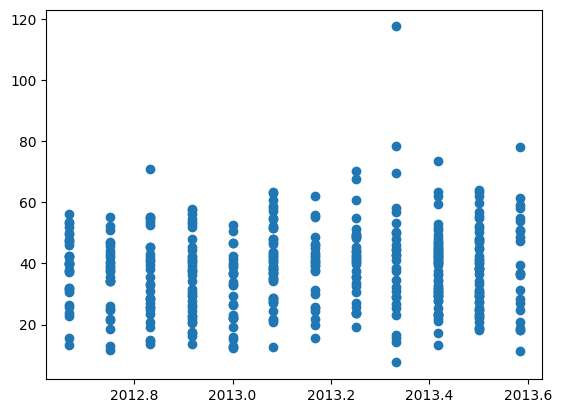

In [12]:
plt.scatter(df.X1_transaction_date,df.Y)

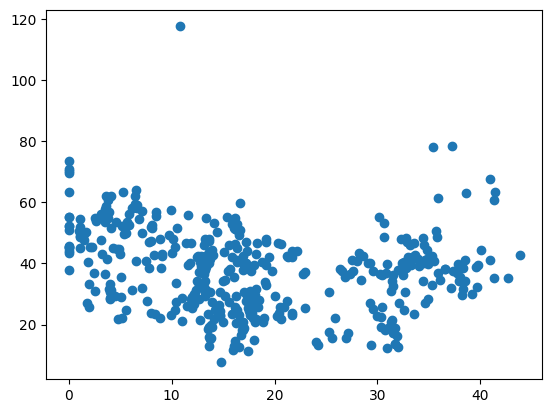

In [13]:
plt.scatter(df.X2_house_age,df.Y)

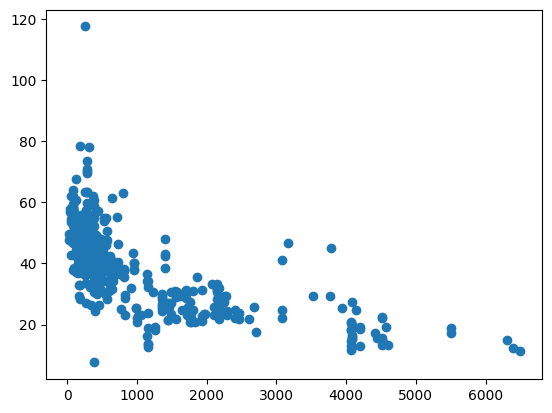

In [14]:
plt.scatter(df.X3_distance_to_the_nearest_MRT_station,df.Y)

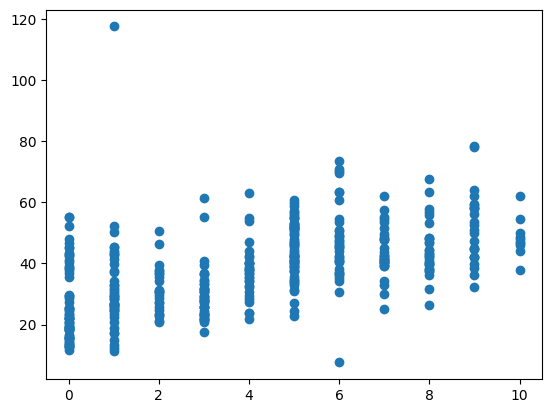

In [15]:
plt.scatter(df.X4_number_of_convenience_stores,df.Y)

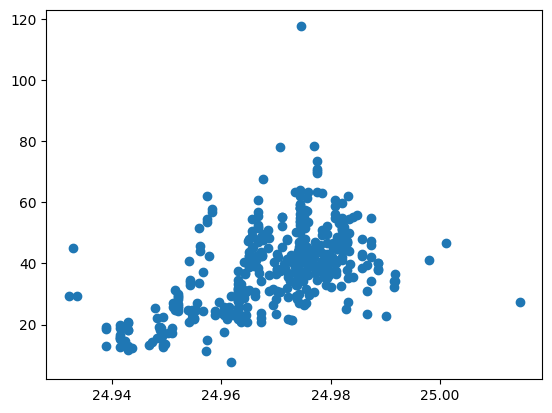

In [16]:
plt.scatter(df.X5_latitude,df.Y)

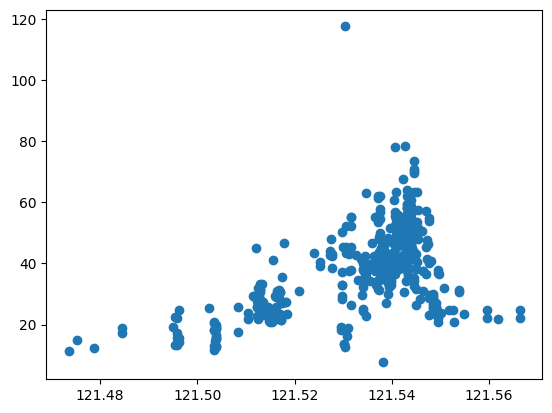

In [17]:
plt.scatter(df.X6_longitude	,df.Y)

In [18]:
df.isnull().sum()

No                                        0
X1_transaction_date                       0
X2_house_age                              0
X3_distance_to_the_nearest_MRT_station    0
X4_number_of_convenience_stores           0
X5_latitude                               0
X6_longitude                              0
Y                                         0
dtype: int64

In [19]:
df_dropped=df.drop(columns=['X1_transaction_date','X4_number_of_convenience_stores','No'])
X=df_dropped.drop('Y',axis=1)
y=df_dropped.Y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [20]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [21]:
reg=LinearRegression1(0.01,45000)
reg.fit(X_train_scaled,y_train)
y_predict=reg.predict(X_test_scaled)

[[-12.85892993]
 [-31.29917595]
 [ 26.53067975]
 [  3.48843795]] [[33.90211934]]


In [22]:
mse=mean_squared_error(y_train,reg.predict(X_train))
print("mse=",mse)

[[-12.85892993]
 [-31.29917595]
 [ 26.53067975]
 [  3.48843795]] [[33.90211934]]
mse= 2545672124.0944533


In [23]:
mse=mean_squared_error(y_test,reg.predict(X_test))
print("mse=",mse)

[[-12.85892993]
 [-31.29917595]
 [ 26.53067975]
 [  3.48843795]] [[33.90211934]]
mse= 2960840692.1012444


In [24]:
r2 = r2_score(y_test, y_predict)

print("R-squared score:", r2)

R-squared score: 0.3659041947599164


In [25]:
reg2=LinearRegression()

In [26]:
reg2.fit(X_train_scaled,y_train)

LinearRegression()

In [27]:
mse=mean_squared_error(y_train,reg2.predict(X_train))
print("mse=",mse)

mse= 3457843829.947047


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [28]:
mse=mean_squared_error(y_test,reg2.predict(X_test))
print("mse=",mse)

mse= 4021422889.5462704


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [29]:
y_predict2=reg2.predict(X_test_scaled)

In [30]:
r2 = r2_score(y_test, y_predict2)

print("R-squared score:", r2)

R-squared score: 0.36853664907052863


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


5. Write code for the sigmoid function and Logistic regression.


In [32]:
def sigmoid(z):
    
    a=1.0/1.0+np.exp(-z)
    return a

def sigmoid_derivative(z):
    der=(1.0/1.0+np.exp(-z))*(1-(1.0/1.0+np.exp(-z)))
    return der

class LogisticRegression1:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias = np.random.randn(1,1)

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples

            self.weights -= self.lr* dw
            self.bias -= self.lr* db

    def predict(self, X):
        
      #Write the predict function
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1 
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [33]:
df=load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [34]:
X=df.data
y=df.target
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)

In [35]:
logreg=LogisticRegression1(0.1,1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


C:\Users\HP\AppData\Local\Temp\ipykernel_13352\125709844.py:3: RuntimeWarning: overflow encountered in exp
  a=1.0/1.0+np.exp(-z)


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))


0.7280701754385965


In [40]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred2=model.predict(X_test)

In [43]:
model=LogisticRegression(penalty=None)
model.fit(X_train,y_train)
y_pred3=model.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.956140350877193


In [44]:
model=LogisticRegression(solver='saga',penalty='l1')
model.fit(X_train,y_train)
y_pred4=model.predict(X_test)
print(accuracy_score(y_test,y_pred4))

0.9473684210526315


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [38]:
print(confusion_matrix(y_test,y_pred))
report = classification_report(y_test, y_pred)
print(report)

[[ 0 31]
 [ 0 83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.73      1.00      0.84        83

    accuracy                           0.73       114
   macro avg       0.36      0.50      0.42       114
weighted avg       0.53      0.73      0.61       114



C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [42]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
report2 = classification_report(y_test, y_pred2)
print(report2)

0.9473684210526315
[[27  4]
 [ 2 81]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.95      0.98      0.96        83

    accuracy                           0.95       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.95      0.95      0.95       114



# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

In [47]:
df=pd.read_csv("C:\\Users\\HP\\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [48]:
df.isnull().sum().sum()

0

In [49]:
X=df.drop('Type',axis=1)
y=df.Type
X=np.array(X)
y=np.array(y)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [51]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN2(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
        
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [52]:
model=KNN2(3)
# X_train=np.array(X_train)
# X_test=np.array(X_test)
model.fit(X_train,y_train)
y_pred2=model.predict(X_test)

In [53]:
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [54]:
ar=accuracy_score(y_test,y_pred2)
print("Accuracy:",ar)

Accuracy: 0.6511627906976745


In [55]:
model=KNN2(2)
model.fit(X_train,y_train)
y_pred3=model.predict(X_test)
ar2=accuracy_score(y_test,y_pred3)
print("Accuracy:",ar2)

Accuracy: 0.7209302325581395


In [56]:
model=KNN2(4)
model.fit(X_train,y_train)
y_pred4=model.predict(X_test)
ar3=accuracy_score(y_test,y_pred4)
print("Accuracy:",ar3)

Accuracy: 0.627906976744186


In [57]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6046511627906976
